In [1]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.functions import load_datasets_from_csv
from plot import show_multi_series, show_serie

from paths import ROOT_DIR, FLLD_DB_DIR
IMG_PATH = ROOT_DIR+'/img/corr'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [2]:
dts = load_datasets_from_csv(FLLD_DB_DIR).copy()

In [3]:
air_pwr = dts['air']['Pwr'].resample('D').mean()
house_di = dts['house']['DI'].resample('D').mean()
air_di = dts['air']['DI'].resample('D').mean()

In [4]:
l = list()

dts['air'].name = 'Ar-condicionado'
dts['computer'].name = 'Computador'
dts['fan'].name = 'Ventilador'
dts['fridge'].name = 'Geladeira'
dts['house'].name = 'Casa'
dts['pump'].name = "Bomba d'água'"


l.append(dts['air'])
l.append(dts['computer'])
l.append(dts['fan'])
l.append(dts['fridge'])
l.append(dts['house'])
l.append(dts['pump'])

In [5]:
external = dts['external']

In [31]:
def corr_matrix(df_lst, FREQ='D'):
    l = list()
    for df in df_lst:
        a = df['Pwr'].resample(FREQ).mean().corr(df['DI'].resample(FREQ).mean())
        b = df['Pwr'].resample(FREQ).mean().corr(external['DI'].resample(FREQ).mean())

        new = pd.DataFrame([a,b], columns=[df.name], index=["IDT no local", "IDT externo"])
        l.append(new)

    return pd.concat(l, axis=1)

In [35]:
hm = corr_matrix(l, FREQ='D')
hm2 = corr_matrix(l, FREQ='W')

In [104]:
def plot_heatmap(hm, min=0, max=1, theme = 'Blues'):

    sns.set_style({'font.family':'sans', 'font.serif':'Helvetica'})
    sns.set_context(rc={"font.size":11,"axes.titlesize":12,"axes.labelsize":12})  
    fig, axs = plt.subplots(figsize=(5,3.5))

    g = sns.heatmap(hm.T, annot=True, cmap=theme, vmin=min, vmax=max, ax=axs)
    g.tick_params(bottom=False, left=False)  # remove the ticks
    plt.tick_params(axis='both', labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.tight_layout()

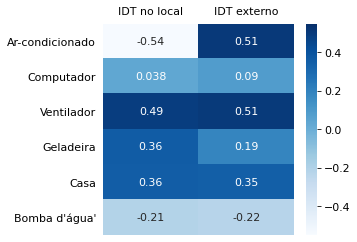

In [106]:
plot_heatmap(hm, -0.55, 0.55)
plt.savefig(IMG_PATH+"/heatmap_corr_daily.svg", dpi=300, pad_inches=0.05, bbox_inches='tight')
plt.savefig(IMG_PATH+"/heatmap_corr_daily.jpeg", dpi=300, pad_inches=0.05, bbox_inches='tight')

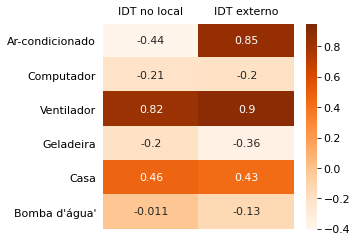

In [107]:
plot_heatmap(hm2, -0.4, 0.95, theme = 'Oranges')
plt.savefig(IMG_PATH+"/heatmap_corr_weekly.svg", dpi=300, pad_inches=0.05, bbox_inches='tight')
plt.savefig(IMG_PATH+"/heatmap_corr_weekly.jpeg", dpi=300, pad_inches=0.05, bbox_inches='tight')

<AxesSubplot:>

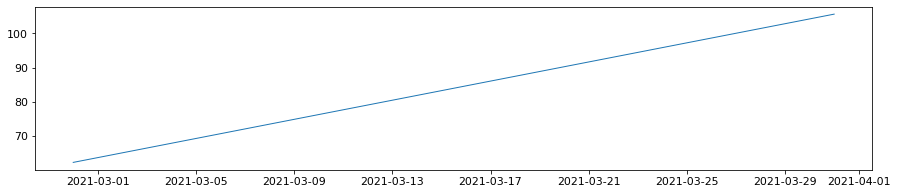

In [25]:
show_serie(dts['air']['Pwr'].resample('M').mean())

<AxesSubplot:>

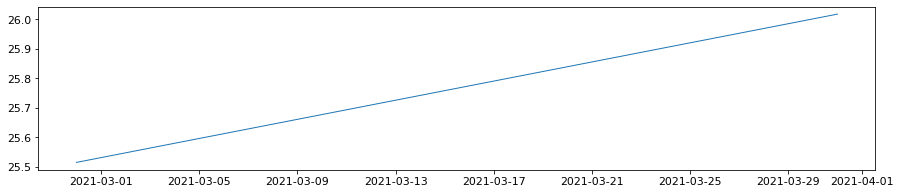

In [24]:
show_serie(dts['external']['DI'].resample('M').mean())